In [2]:
import tensorflow as tf

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_datat_data

In [4]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

### Data Format

In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [11]:
mnist.train.images.shape

(55000, 784)

In [12]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
sample = mnist.train.images[4000].reshape(28,28)

In [31]:
sample[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04705883,
       0.9333334 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,
       0.9960785 , 0.89019614, 0.32941177, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [32]:
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

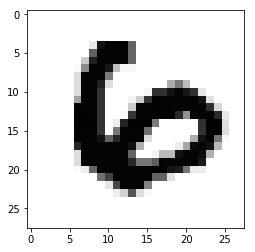

In [36]:
plt.imshow(sample, cmap='Greys')

In [37]:
learning_rate = 0.001

In [38]:
training_epochs = 15

In [39]:
batch_size = 100

In [42]:
n_classes = 10
n_samples = mnist.train.num_examples

In [45]:
#mnist.train.num_examples

In [46]:
n_input = 784

In [47]:
n_hidden_1 = 256
n_hidden_2 = 256

In [48]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [49]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [50]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [51]:
x = tf.placeholder('float', [None, n_input])

In [52]:
y = tf.placeholder('float', [None, n_classes])

In [53]:
pred = multilayer_perceptron(x, weights, biases)

In [55]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Training the Model

In [72]:
t = mnist.train.next_batch(1)

In [73]:
len(t)

2

In [74]:
len(t[0]), len(t[1])

(1, 1)

In [75]:
#tuple unpacking
Xsamp, ysamp = t

In [108]:
#Xsamp
ysamp

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

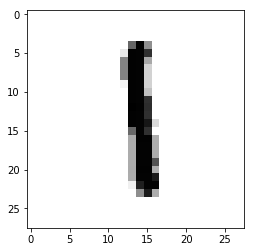

In [84]:
plt.imshow(Xsamp.reshape(28,28), cmap='Greys')

In [85]:
ysamp

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Run the Session

In [86]:
sess = tf.InteractiveSession()

In [105]:
init = tf.initialize_all_variables()

In [106]:
sess.run(init)

In [107]:
#15 loops
for epoch in range(training_epochs):
    #cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        #when you dont need a value in tuple unpacking situation give _
        _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    #cost{:.4f} means upto 4 floating decimals   
    print("EPOCH: {} cost{:.4f}".format(epoch+1, avg_cost))
    
print('Model has completed {} Epochs of training'.format(training_epochs))

EPOCH: 1 cost-28530468.1098
EPOCH: 2 cost-444076543.9709
EPOCH: 3 cost-1792049488.7564
EPOCH: 4 cost-4400233338.8800
EPOCH: 5 cost-8465629358.0800
EPOCH: 6 cost-14119593950.4873
EPOCH: 7 cost-21468647807.5346
EPOCH: 8 cost-30609723797.8764
EPOCH: 9 cost-41643504435.2000
EPOCH: 10 cost-54667163692.6836
EPOCH: 11 cost-69783830237.5564
EPOCH: 12 cost-87089939340.5672
EPOCH: 13 cost-106685651234.4436
EPOCH: 14 cost-128682049372.1601
EPOCH: 15 cost-153185697270.6907
Model has completed 15 Epochs of training


## Model Evaluations

In [109]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [110]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=bool)


In [111]:
correct_predictions

<tf.Tensor 'Equal_1:0' shape=(?,) dtype=bool>

In [112]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [113]:
print(correct_predictions)

Tensor("Cast_1:0", shape=(?,), dtype=float32)


In [114]:
accuracy = tf.reduce_mean(correct_predictions)

In [115]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [116]:
 #just for example
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [118]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.0958

### You have done